In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import g3py as g3


g3.style_seaborn()
g3.style_widget()

x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.35)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 108 (34.95145631067961%)


In [2]:
gp = g3.GaussianProcess(x, g3.Zero(), g3.SE())
gp.describe('Sunspots','YEAR','SUNACTIVITY')

Space Dimensions:  (309, 1)
Definition OK
Compilation OK


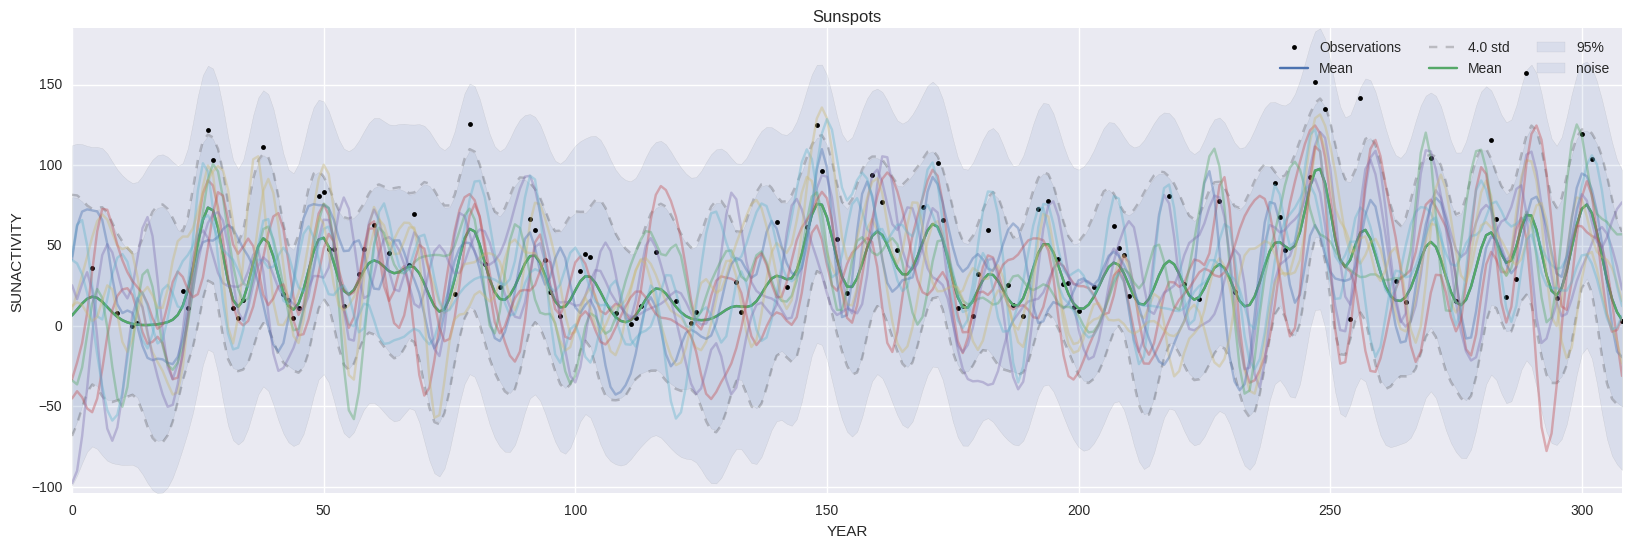

In [3]:
gp.observed(x_obs, y_obs)
gp.plot(samples=10)

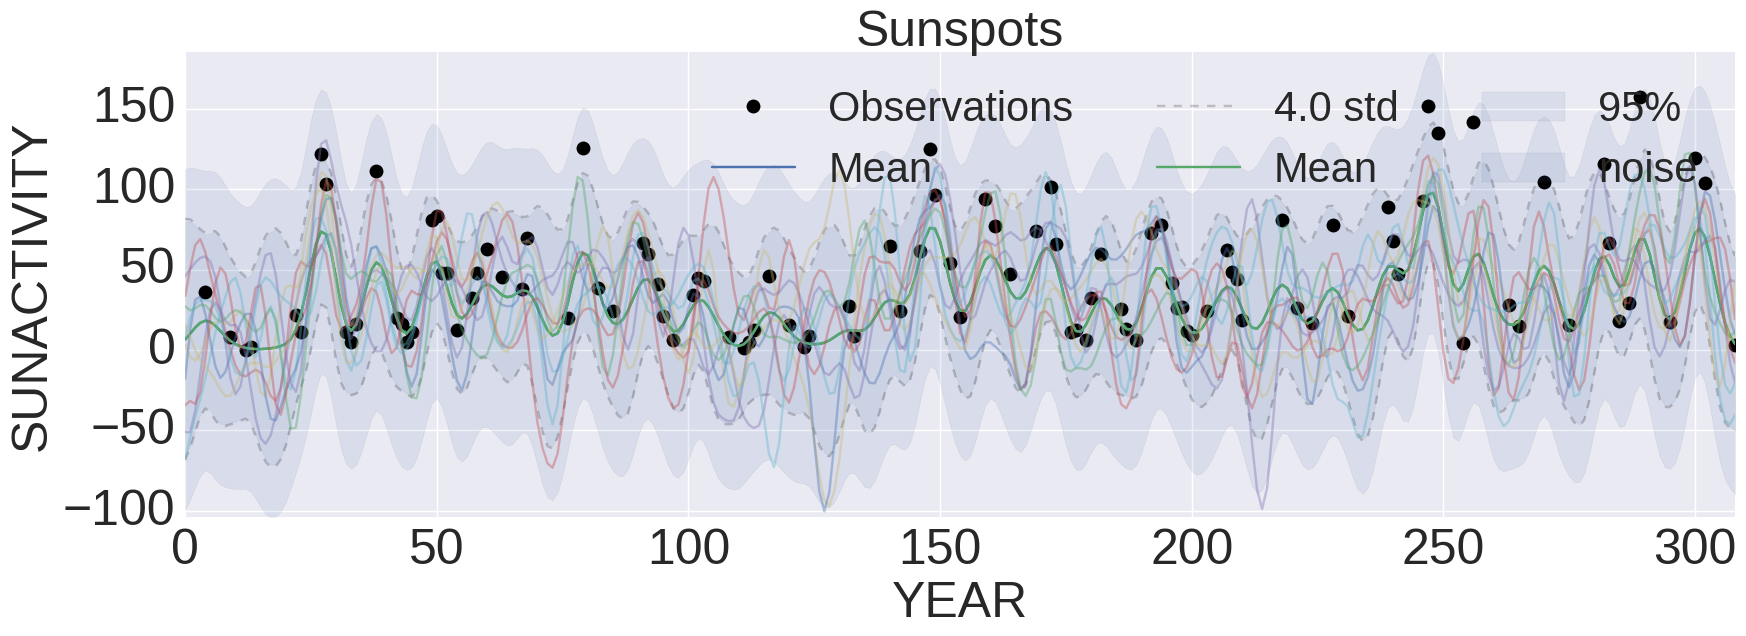

In [4]:
g3.style_big_seaborn()
gp.plot(samples=10)

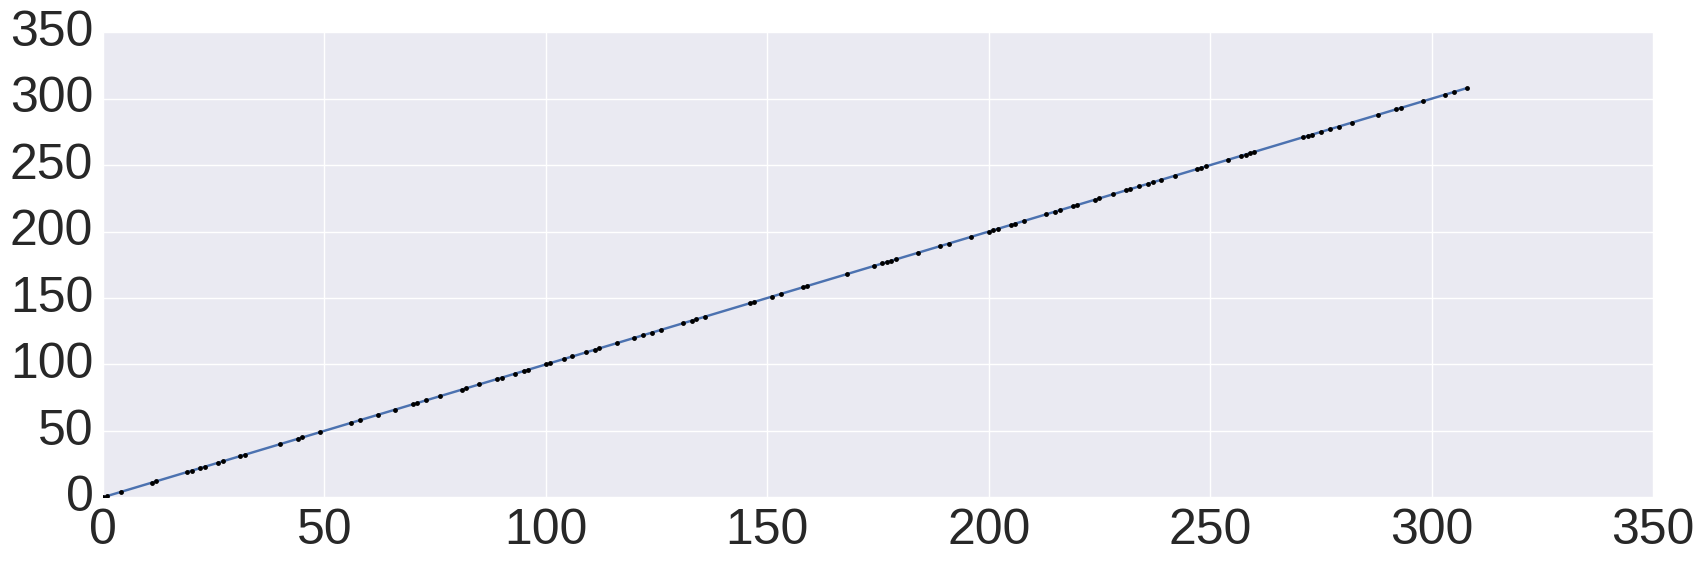

In [5]:
gp.plot_space()

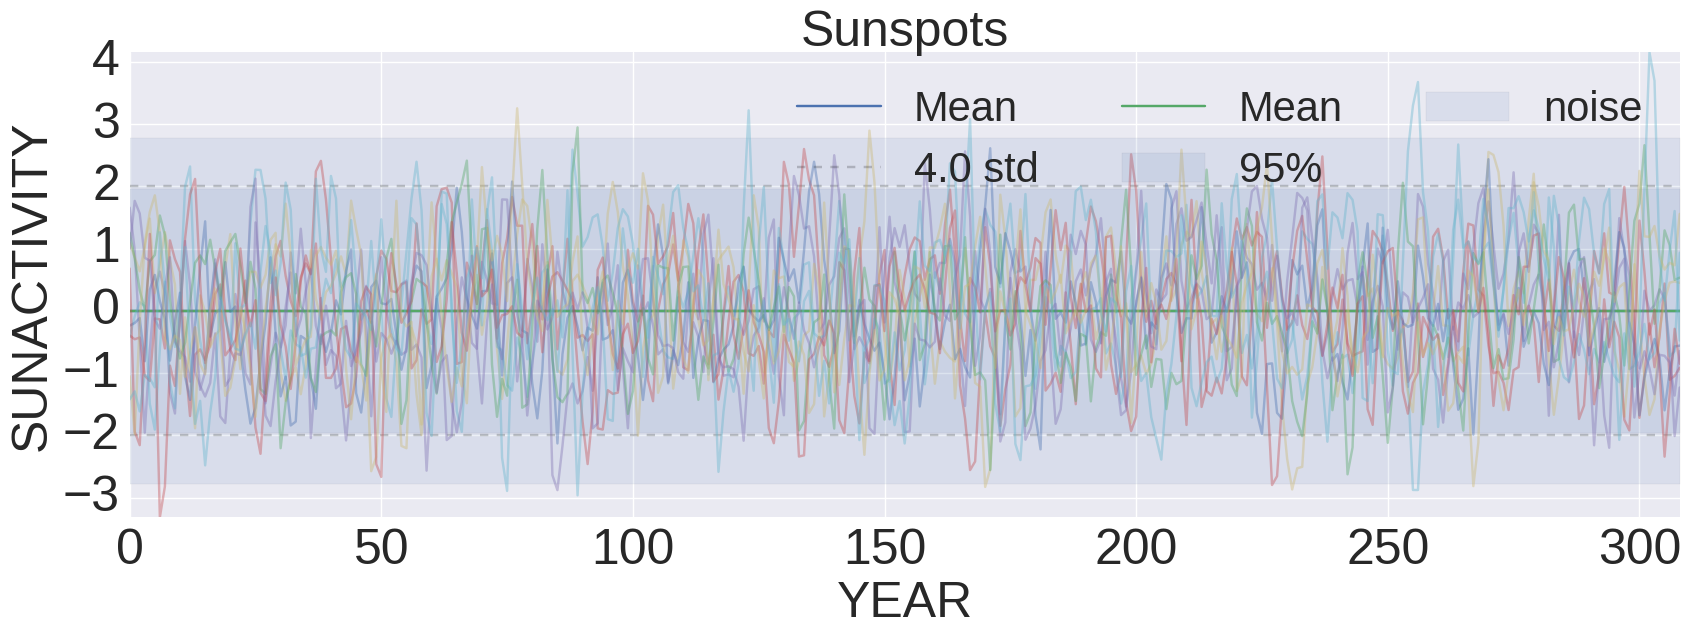

In [6]:
gp.observed(None)
gp.plot(samples=10)

Starting function value (-logp): 564.606


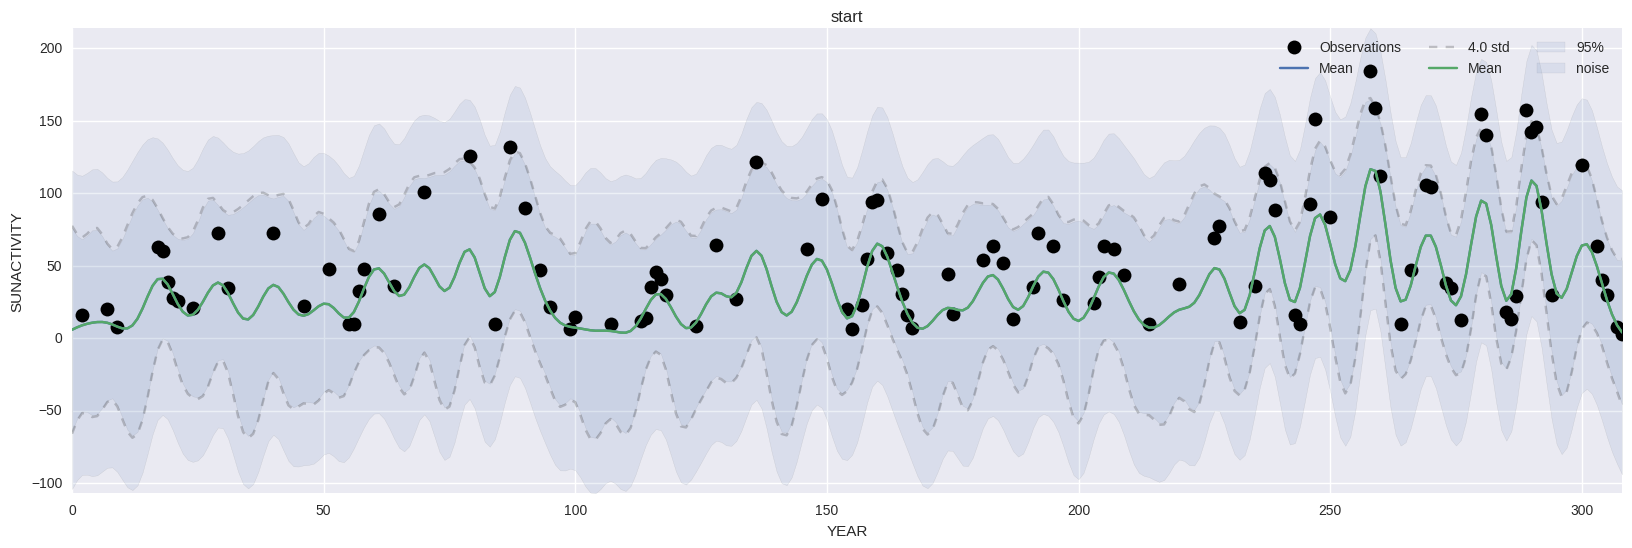


start_bfgs
         Current function value: 526.801086
         Iterations: 10
         Function evaluations: 98
         Gradient evaluations: 86


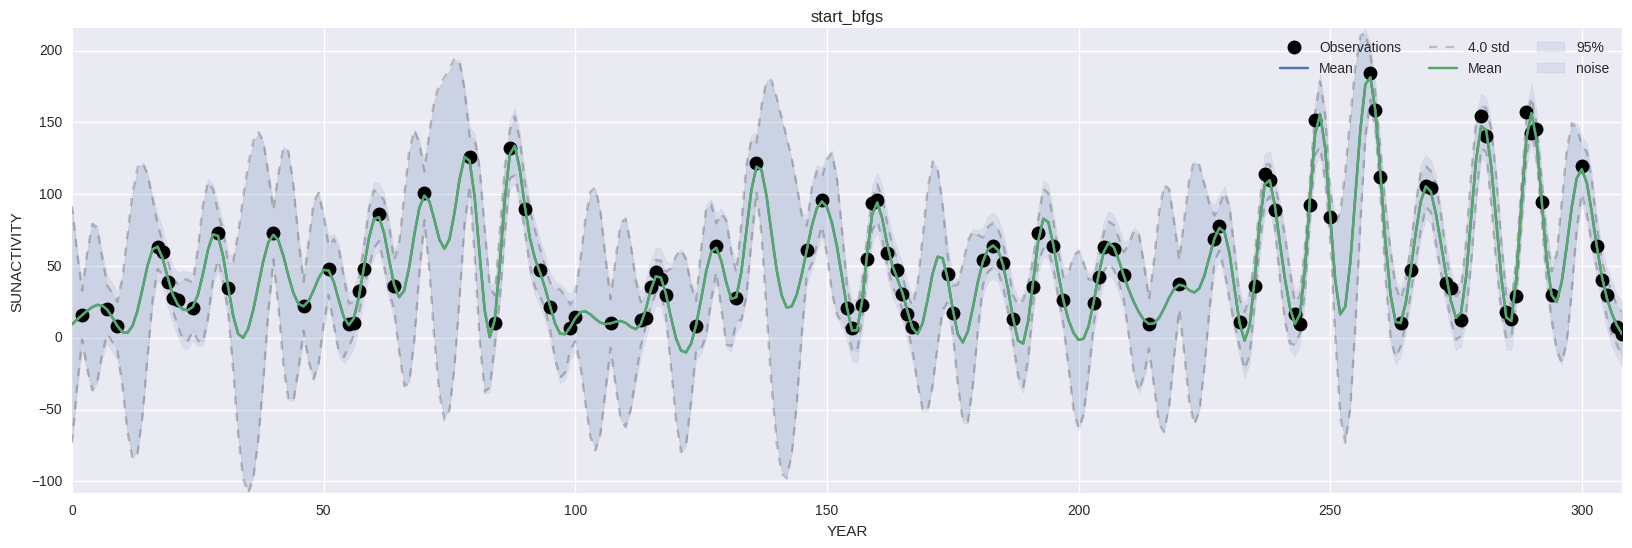


start_powell
Optimization terminated successfully.
         Current function value: 526.801208
         Iterations: 4
         Function evaluations: 194


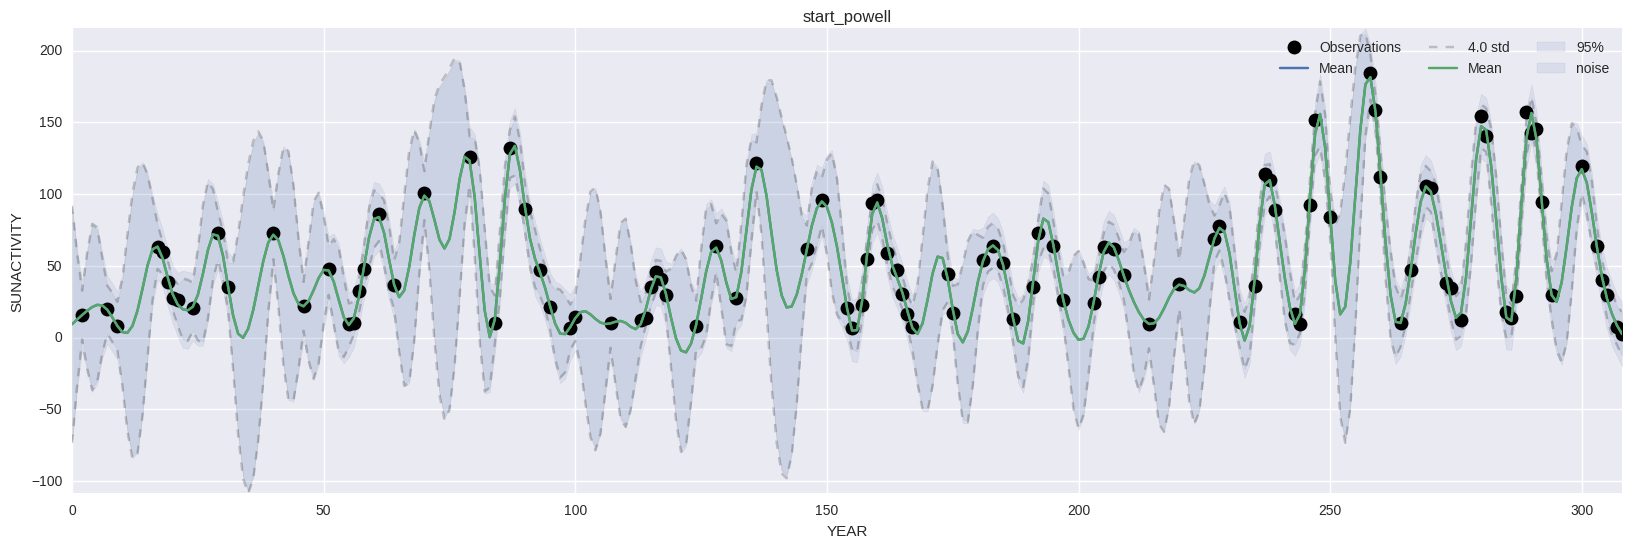

In [5]:
gp.observed(x_obs, y_obs)
params = gp.find_MAP(points=2, plot=True)

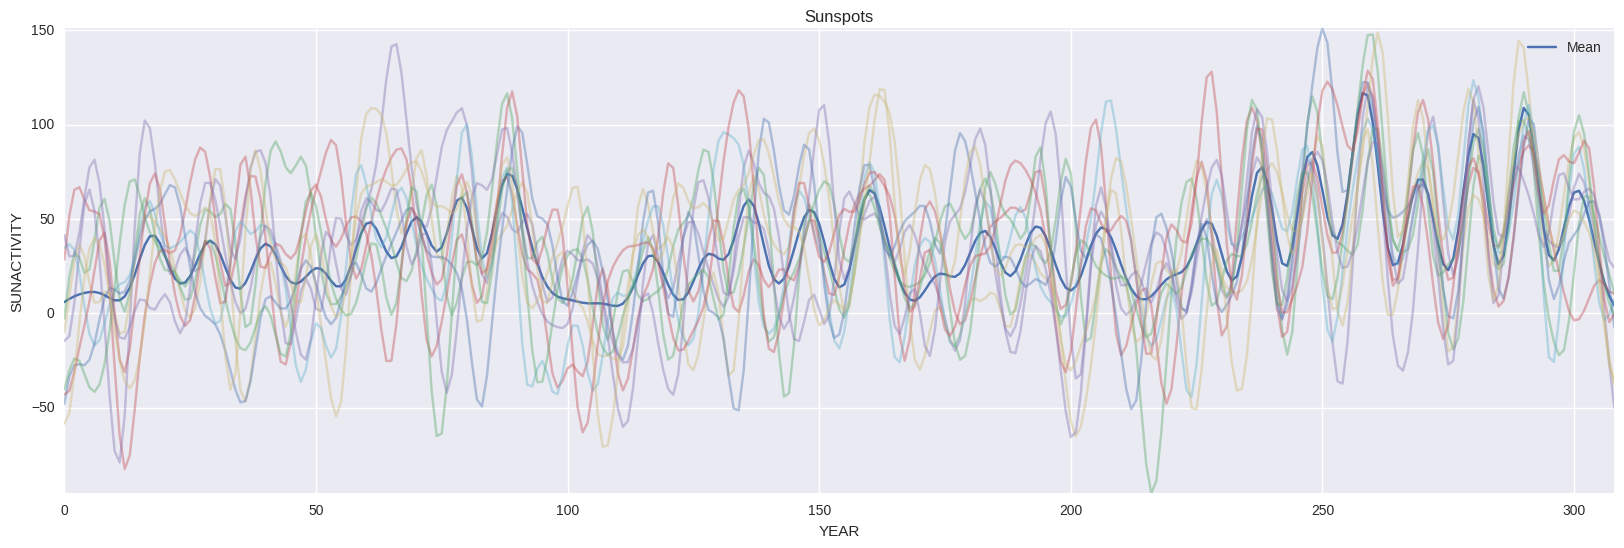

In [6]:
gp.plot(samples=10, data=False, var=False, median=False, quantiles=False, noise=False, prior=False)

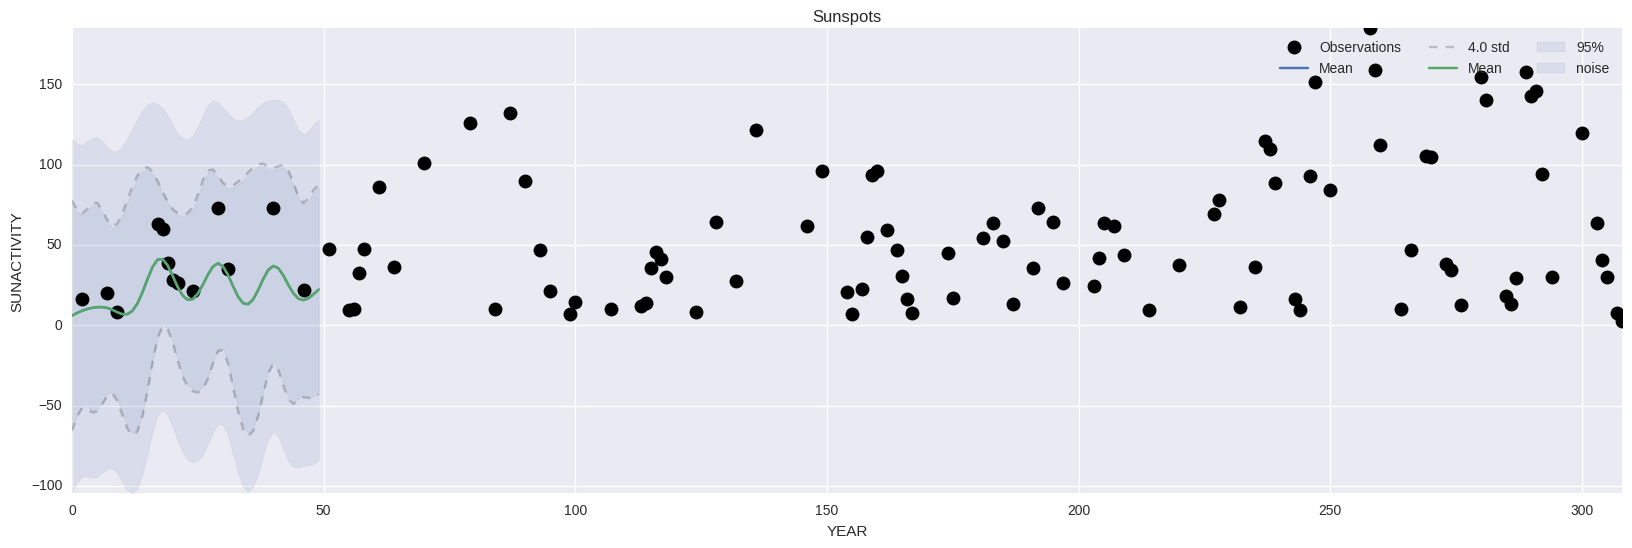

In [7]:
gp.plot(space=x[:50,None], median=True)

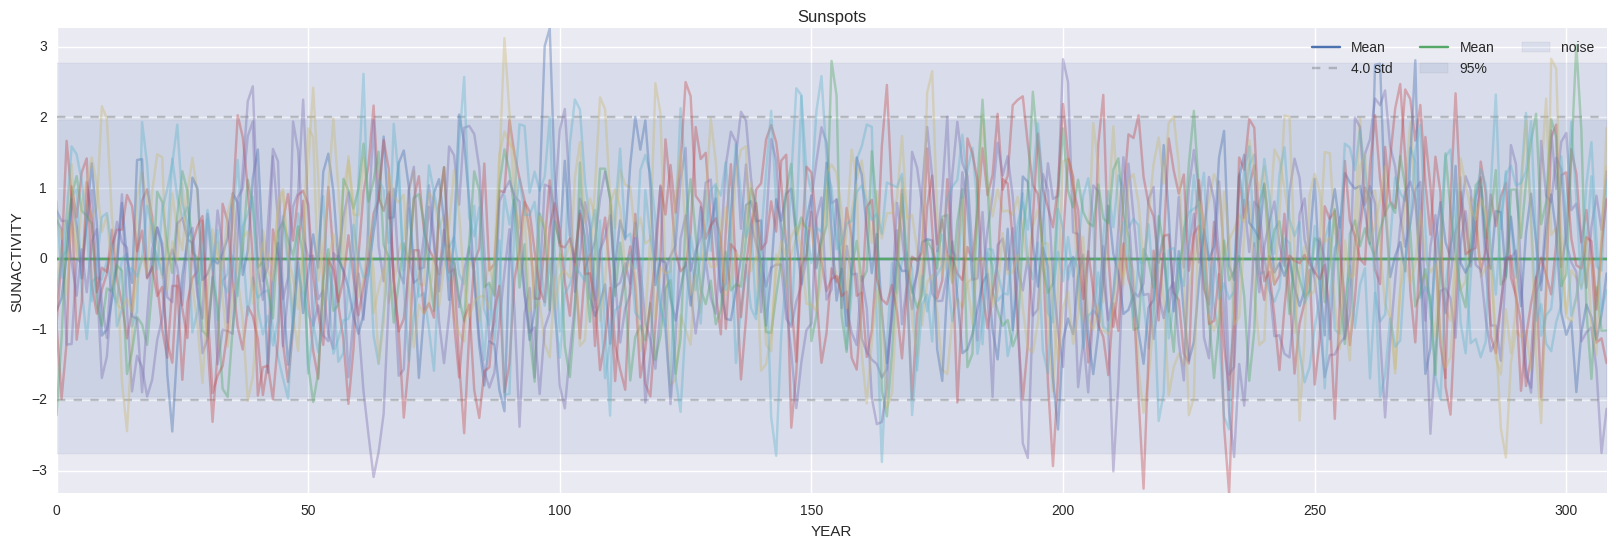

In [8]:
gp.observed(x_obs[:0], y_obs[:0])
gp.plot(space=x[:,None], samples=10, prior=True)

In [11]:
gp.get_params_current()

{'GP_Noise_Var_log_': array(0.0, dtype=float32),
 'GP_SE_ARD_L2_Scales_log_': array([ 0.], dtype=float32),
 'GP_SE_Var_log_': array(0.0, dtype=float32)}

In [40]:
gp.model.logpt

Elemwise{add,no_inplace}.0

In [56]:
gp.sample_hypers()

For sample_hypers it is necessary to have observations


{'GP_Noise_Var_log_': array(0.0, dtype=float32),
 'GP_SE_ARD_L2_Scales_log_': array([ 0.], dtype=float32),
 'GP_SE_Var_log_': array(0.0, dtype=float32)}

In [53]:
params = gp.find_MAP(points=2, plot=True)

For find_MAP it is necessary to have observations


In [54]:
traces = gp.sample_hypers()

For sample_hypers it is necessary to have observations


In [ ]:
gp.set_params(params)
gp.plot(samples=10)

In [ ]:
gp.plot(samples=10, data=False, prior=True)

In [ ]:
gp.widget_params()

In [ ]:
gp.set_params(gp.get_params_widget())

In [ ]:
gp.get_params_current()

In [ ]:
gp.set_params(gp.get_params_default())

In [ ]:
gp.get_params_default()

In [ ]:
widget_params = gp.get_params_widget()
widget_params

In [ ]:
widget_params.pop('GaussianProcess_Noise_Var_log_')
widget_params.pop('GaussianProcess_SE_Var_log_')

widget_params

In [ ]:
gp.fix_params(widget_params)

In [ ]:
gp.fix_params({})

In [ ]:
tgp = g3.TransformedGaussianProcess(x, g3.Zero(), g3.SE(x), g3.BoxCoxShifted(y))

In [ ]:
tgp.describe('Sunspots','YEAR','SUNACTIVITY')
tgp.observed(x_obs, y_obs)
tgp.plot()

In [ ]:
tgp.plot(samples=10)

In [ ]:
gp.observed(x_obs, y_obs)
gp.set_params(gp.get_params_default())
gp.plot(samples=10)

In [ ]:
tgp.plot(prior=True, samples=10)

In [ ]:
gp.get_params_current()

In [ ]:
gp.plot()

In [ ]:
tgp.get_params_current()

In [ ]:
tgp.plot()

In [ ]:
traces = tgp.sample_hypers(advi=False)

In [ ]:
tgp.widget_traces(traces)

In [ ]:
tgp2 = g3.TransformedGaussianProcess(x, g3.Bias(), g3.SM(x), g3.BoxCoxShifted(y))

In [ ]:
tgp2.observed(x_obs, y_obs)
tgp2.plot()

In [ ]:
tgp2.widget_params()

In [ ]:
tgp2.set_params(tgp2.get_params_widget())

In [ ]:
params = tgp2.find_MAP(points=4, plot=True)

In [ ]:
tgp2.plot(params, var=False)

In [ ]:
traces = tgp2.sample_hypers(start=params)